In [ ]:
from statsmodels.datasets import macrodata
data = macrodata.load_pandas().data


In [ ]:
pip install pandas matplotlib statsmodels


<ipython-input-3-8dc7fa5d7e99>:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.index = pd.date_range(start='1959-03', periods=len(df), freq='Q')


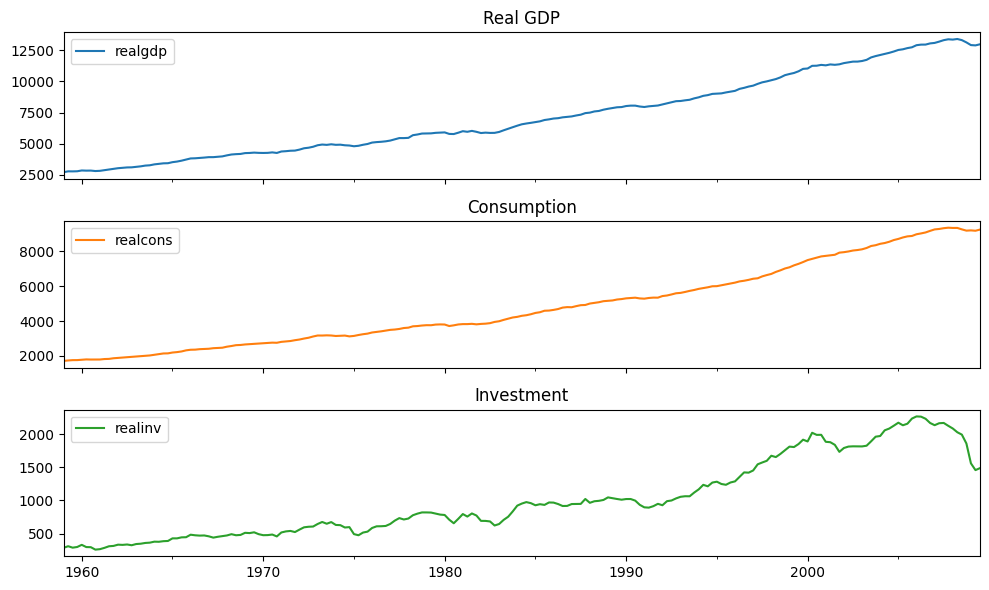

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.datasets import macrodata

# Load data
data = macrodata.load_pandas().data

# Convert to DataFrame
df = data[['realgdp', 'realcons', 'realinv']]
df.index = pd.date_range(start='1959-03', periods=len(df), freq='Q')

# Visualize
df.plot(subplots=True, figsize=(10, 6), title=["Real GDP", "Consumption", "Investment"])
plt.tight_layout()
plt.show()


In [ ]:
train = df[:-8]  # All except last 8 observations
test = df[-8:]   # Last 8 quarters


In [ ]:
# Fit the model
model = VAR(train)
results = model.fit(maxlags=15, ic='aic')  # Let AIC decide best lag

# Summary
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Apr, 2025
Time:                     02:52:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.9041
Nobs:                     193.000    HQIC:                   19.6929
Log likelihood:          -2687.05    FPE:                3.09104e+08
AIC:                      19.5491    Det(Omega_mle):     2.77771e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              22.880795        17.361359            1.318           0.188
L1.realgdp          0.493490         0.156588            3.152           0.002
L1.realcons         1.274303         0.190500            6.689    

In [ ]:
# Forecast next 8 steps
lag_order = results.k_ar
forecast_input = train.values[-lag_order:]

forecast = results.forecast(y=forecast_input, steps=8)

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=df.columns)

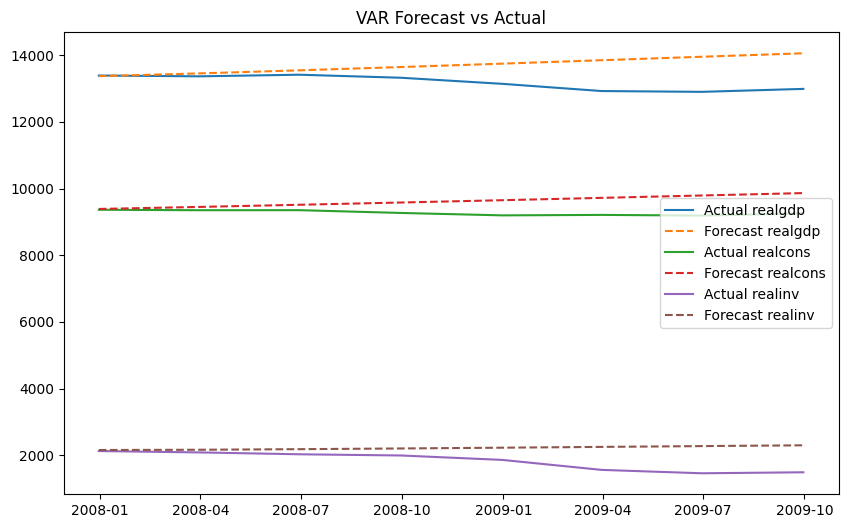

In [ ]:
plt.figure(figsize=(10,6))
for col in df.columns:
    plt.plot(test.index, test[col], label=f'Actual {col}')
    plt.plot(forecast_df.index, forecast_df[col], '--', label=f'Forecast {col}')
plt.legend()
plt.title("VAR Forecast vs Actual")
plt.show()
